# Networkx: Basics
The first package to play with networks. **Do not use in case of**:
- Large-scale problems that require faster approaches (i.e. massive networks with 100M/1B edges)
- Better use of memory/threads than Python (large objects, parallel computation)


In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

By definition, a Graph $G$ is a collection of nodes (vertices) along with identified pairs of nodes (called edges, links, etc).  
In NetworkX, nodes can be any hashable object e.g. a text string, an image, an XML object, another Graph,
a customized node object, etc. (Note: Python’s *None* object should not be used as a node as it determines whether
optional function arguments have been assigned in many functions.)  
**Note** Lists are not allowed, as they are not hashable in python.

In [2]:
G=nx.Graph()

## Adding Nodes  
Nodes can be addedd manually or read from a list:

In [3]:
G.add_node(1)
G.add_nodes_from([2,3])

Graphs can be easily visualised by typing

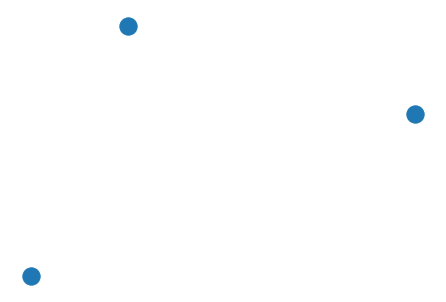

In [4]:
nx.draw(G)

Another option is to add a *nbunch* of nodes. An *nbunch* is any iterable container of nodes that is not itself a node in the graph. (e.g. a list, set, graph, file, etc..). Even another graph works.

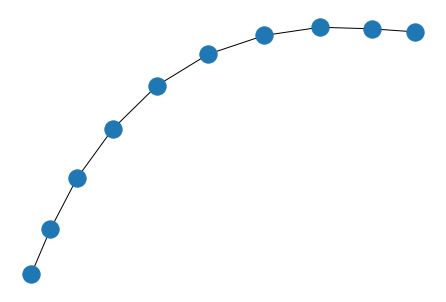

In [5]:
#First I create a path graph
H=nx.path_graph(10)
nx.draw(H)

In [6]:
#then I include it in the graph
G.add_nodes_from(H)

In [7]:
len(nx.nodes(G))

10

In [8]:
nx.nodes(G)

NodeView((1, 2, 3, 0, 4, 5, 6, 7, 8, 9))

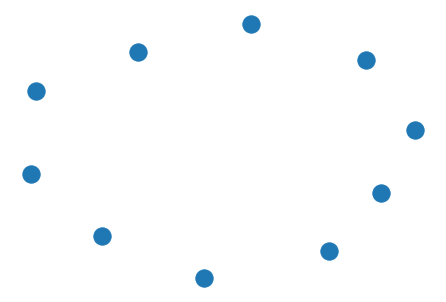

In [9]:
nx.draw(G)

#The edges!!!!

The graph $G$ now contains $H$ nodes. 

In [10]:
G.add_node(H)

Now $G$ contains $H$ as a _node_. This flexibility is very effective as it allows graphs of graphs, graphs of files, graphs of functions and much more. It is worth thinking about how to structure your application so that the nodes are useful entities. Of course you can always use a unique identifier in $G$ and have a separate dictionary keyed by identifier to the node information if you prefer. 

*(Note: You should not change the node object if the hash depends on its contents.)*

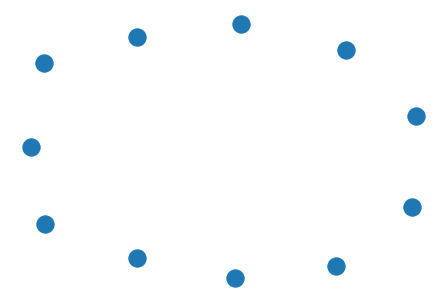

In [11]:
nx.draw(G)

#The edges!!!!

In [12]:
len(nx.nodes(G))

11

In [13]:
nx.nodes(G)

NodeView((1, 2, 3, 0, 4, 5, 6, 7, 8, 9, <networkx.classes.graph.Graph object at 0x7f72a0798f98>))

## Adding Edges

As for nodes, edges can be added one by one or imported form a file, another graph etc.

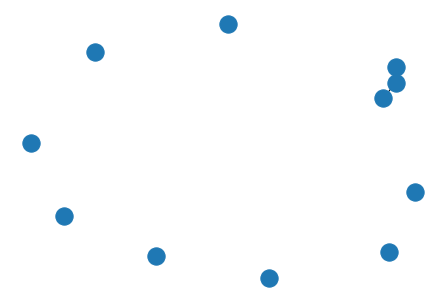

In [14]:
#G can also be grown by adding one edge at a time,
G.add_edge(1,2)
e=(2,3)
G.add_edge(*e) # unpack edge tuple*
nx.draw(G)

In [15]:
 G.add_edge(H,1)

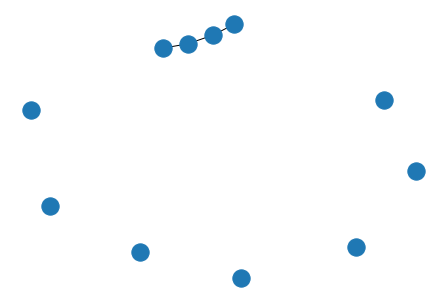

In [16]:
nx.draw(G)

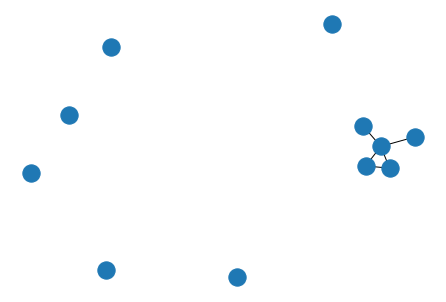

In [17]:
#by adding a list of edges,
G.add_edges_from([(1,4),(1,3)])
nx.draw(G)

As for nodes we can add any *ebunch* of edges. An *ebunch* is any iterable container of edge-tuples. An edge-tuple can be a 2-tuple of nodes or a 3-tuple with 2 nodes followed by an edge attribute dictionary, e.g. 

    (2,3,{‘weight’:3.1415}). 

Edge attributes are discussed further below

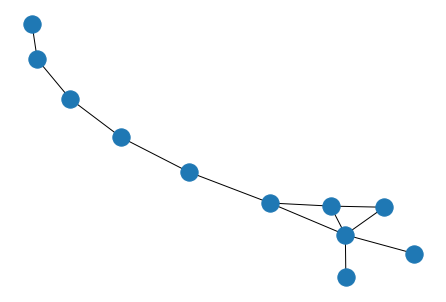

In [18]:
G.add_edges_from(H.edges())
nx.draw(G)

## Removing edges or nodes

Graphs can be demolished in a similar way by using: 

    Graph.remove_node()
    Graph.remove_nodes_from()
    Graph.remove_edge()
    Graph.remove_edges_from()

By example:

In [19]:
#We can remove some spefic set of nodes
G.remove_nodes_from(H)

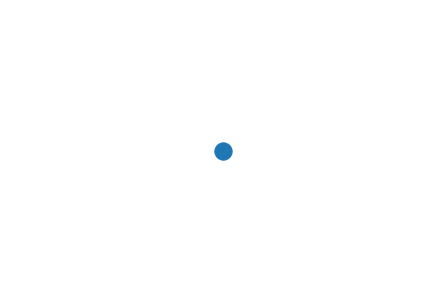

In [20]:
nx.draw(G)

In [21]:
#or we can wipe out everything
G.clear() # this removes everything!

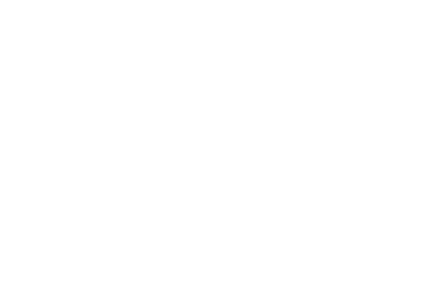

In [22]:
nx.draw(G)

There are no problems when adding existing nodes or edges. For example, after removing all nodes and edges, NetworkX does not complain :)

In [23]:
G.add_edges_from([(1,2),(1,3)])
G.add_node(1)
G.add_edge(1,2)
G.add_node("spam") # adds node "spam". Yes, a node can be a string too...
G.add_nodes_from("spam") # adds 4 nodes: ’s’, ’p’, ’a’, ’m’, when the "s" really marks the difference :)

In [24]:
nx.nodes(G)

NodeView((1, 2, 3, 'spam', 's', 'p', 'a', 'm'))

Nodes and edges are not specified as NetworkX objects. All meaningful items can be used as nodes and edges. 

Common choices are numbers or strings, but a node can be any hashable object(except None), and an edge can be associated with any object X using: 

    G.add_edge(n1,n2,object=X) 

As an example, n1 and n2 could be names in the internet movie database, and x could refer to an XML record of characters played together with the intractions with other actors.

You can also use 

    convert_node_labels_to_integers() 

and obtain a more traditional graph with integer labels.

## Inspecting the graph

In [25]:
NoN=G.number_of_nodes()
NoE=G.number_of_edges()

#We can examine them with
NoN, NoE,G.nodes()

(8, 2, NodeView((1, 2, 3, 'spam', 's', 'p', 'a', 'm')))

In [26]:
G.edges()

EdgeView([(1, 2), (1, 3)])

In [27]:
neigh=G.neighbors(1)
neigh

A odd way of presenting the result...

In [28]:
list(neigh)

[2, 3]

Removing nodes or edges has similar syntax to adding

In [29]:
G.remove_nodes_from("spam")
G.nodes()

NodeView((1, 2, 3, 'spam'))

In [30]:
#otherwise you can remove a single specific edge:
G.remove_edge(1,3)
G.edges()

EdgeView([(1, 2)])

### Exercise: draw the Florentine families dataset

#### Get the adjacency matrix of the Florentine families

In [31]:
with open('../Data/florentine_families.dat', 'r') as file:
    all_file=file.readlines()

In [32]:
name_list=all_file[4:20]

In [33]:
families=[n.split('\n')[0] for n in name_list]

In [34]:
all_file[41:]

[' 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0\n',
 ' 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0\n',
 ' 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0\n',
 ' 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0\n',
 ' 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0\n',
 ' 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n',
 ' 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1\n',
 ' 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0\n',
 ' 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1\n',
 ' 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0\n',
 ' 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0\n',
 ' 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n',
 ' 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1\n',
 ' 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0\n',
 ' 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0\n',
 ' 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0\n',
 ' 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n',
 ' 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n',
 ' 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0\n',
 ' 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0\n',
 ' 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0\n',
 ' 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0\n',
 ' 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0\n',
 ' 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0\n',
 ' 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1\n',
 ' 0 0 0 0 0 0 0 0 1 0 0 

Actually, they are two adjacency matrices: first the one of marriages, then the one of business ties.

In [1]:
ff_adj=np.genfromtxt('../Data/florentine_families.dat', skip_header=41, dtype='i8')[:16]

NameError: name 'np' is not defined

In [36]:
ff_adj.shape

(16, 16)

In [37]:
np.all(ff_adj.T==ff_adj)

True

In [38]:
del file, all_file

#### Add the edges

In [39]:
G=nx.Graph()

In [40]:
where_0=np.where(ff_adj==1)
who=np.vstack((where_0[0], where_0[1])).T
edges=[]
for w in who:
    if w[0]<w[1]:
        edges.append((families[w[0]],families[w[1]]))

In [41]:
edges

[('ACCIAIUOL', 'MEDICI'),
 ('ALBIZZI', 'GINORI'),
 ('ALBIZZI', 'GUADAGNI'),
 ('ALBIZZI', 'MEDICI'),
 ('BARBADORI', 'CASTELLAN'),
 ('BARBADORI', 'MEDICI'),
 ('BISCHERI', 'GUADAGNI'),
 ('BISCHERI', 'PERUZZI'),
 ('BISCHERI', 'STROZZI'),
 ('CASTELLAN', 'PERUZZI'),
 ('CASTELLAN', 'STROZZI'),
 ('GUADAGNI', 'LAMBERTES'),
 ('GUADAGNI', 'TORNABUON'),
 ('MEDICI', 'RIDOLFI'),
 ('MEDICI', 'SALVIATI'),
 ('MEDICI', 'TORNABUON'),
 ('PAZZI', 'SALVIATI'),
 ('PERUZZI', 'STROZZI'),
 ('RIDOLFI', 'STROZZI'),
 ('RIDOLFI', 'TORNABUON')]

In [42]:
G.add_edges_from(edges)

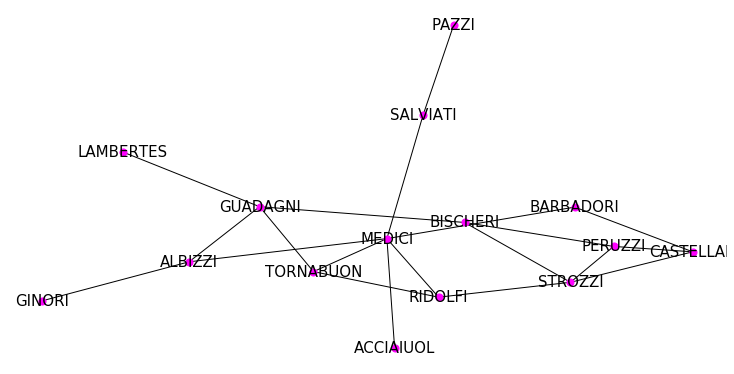

In [43]:
plt.figure(figsize=(10, 5))
# Actaully, you can use the matplotlib functions in order to have a help
nx.draw(G, with_labels=True, node_color='magenta', node_size=50, font_size=15)
plt.savefig("../ff_network.png")

Note that re-evaluating the cell, the disposition of nodes changes. That's because the layout function under the hood has a random term inside. Anyway, you can use other layout!

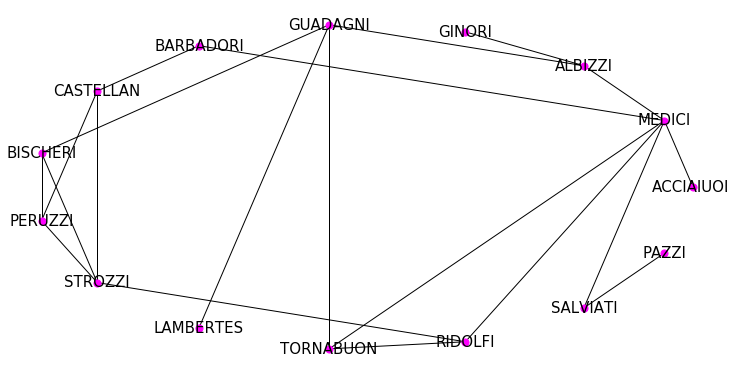

In [44]:
plt.figure(figsize=(10, 5))
# Actaully, you can use the matplotlib functions in order to have a help
nx.draw_circular(G, with_labels=True, node_color='magenta', node_size=50, font_size=15)

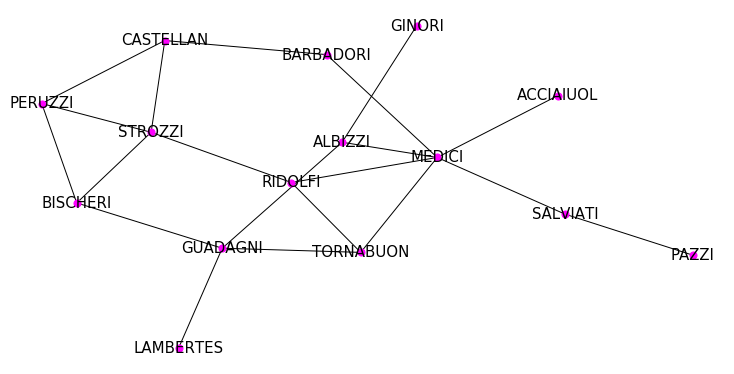

In [45]:
plt.figure(figsize=(10, 5))
# Actaully, you can use the matplotlib functions in order to have a help
nx.draw_kamada_kawai(G, with_labels=True, node_color='magenta', node_size=50, font_size=15)

Already seen...

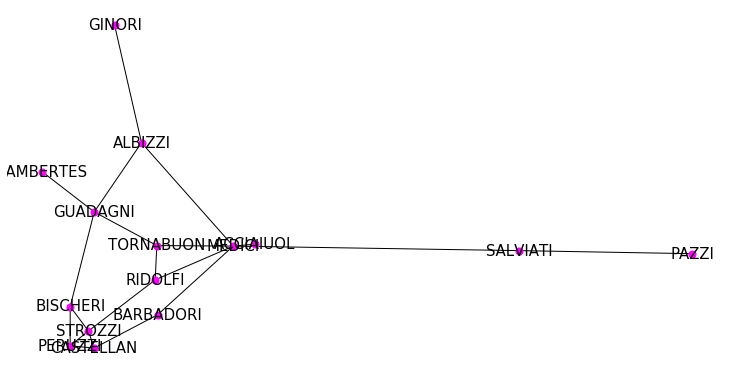

In [46]:
plt.figure(figsize=(10, 5))
# Actaully, you can use the matplotlib functions in order to have a help
nx.draw_spectral(G, with_labels=True, node_color='magenta', node_size=50, font_size=15)

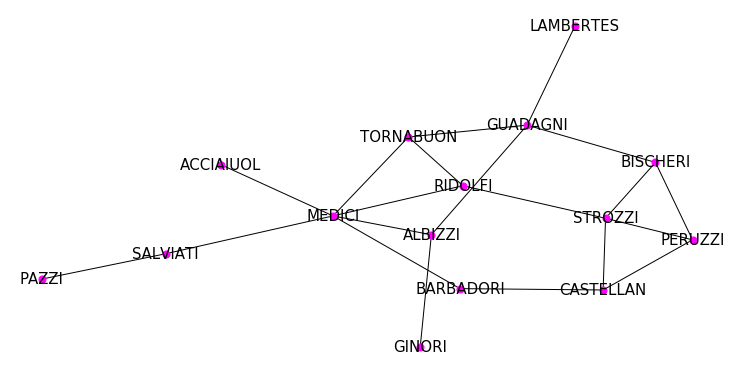

In [47]:
plt.figure(figsize=(10, 5))
# Actaully, you can use the matplotlib functions in order to have a help
nx.draw_spring(G, with_labels=True, node_color='magenta', node_size=50, font_size=15)

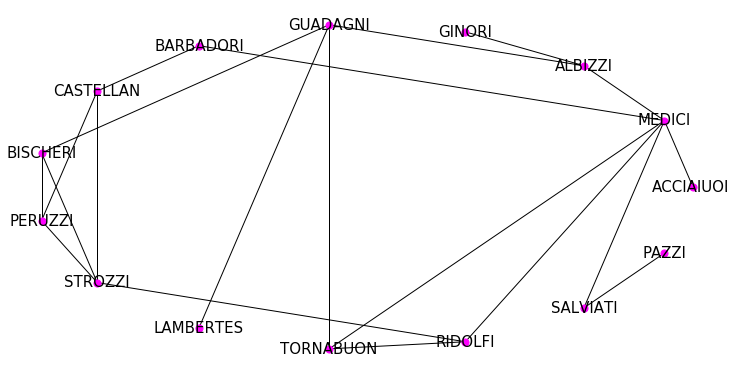

In [48]:
plt.figure(figsize=(10, 5))
# Actaully, you can use the matplotlib functions in order to have a help
nx.draw_shell(G, with_labels=True, node_color='magenta', node_size=50, font_size=15)

### Exercise: draw the Zachary Karate Club dataset

### NetworkX representation

Fast direct access to the graph data structure is possible using subscript notation

In [49]:
G['MEDICI']

AtlasView({'ACCIAIUOL': {}, 'ALBIZZI': {}, 'BARBADORI': {}, 'RIDOLFI': {}, 'SALVIATI': {}, 'TORNABUON': {}})

It is an adjacency list! But what is the reason of this dictionary view? Actually is the way we set an attribute of an edge...

In [50]:
G['MEDICI']['TORNABUON']['color']='blue'

In [51]:
G['MEDICI']

AtlasView({'ACCIAIUOL': {}, 'ALBIZZI': {}, 'BARBADORI': {}, 'RIDOLFI': {}, 'SALVIATI': {}, 'TORNABUON': {'color': 'blue'}})

#### Degree

In [52]:
G.degree()

DegreeView({'ACCIAIUOL': 1, 'MEDICI': 6, 'ALBIZZI': 3, 'GINORI': 1, 'GUADAGNI': 4, 'BARBADORI': 2, 'CASTELLAN': 3, 'BISCHERI': 3, 'PERUZZI': 3, 'STROZZI': 4, 'LAMBERTES': 1, 'TORNABUON': 3, 'RIDOLFI': 3, 'SALVIATI': 2, 'PAZZI': 1})

#### Neighbors

In [53]:
list(G.neighbors('MEDICI'))

['ACCIAIUOL', 'ALBIZZI', 'BARBADORI', 'RIDOLFI', 'SALVIATI', 'TORNABUON']

#### Common Neighbors

In [54]:
list(nx.common_neighbors(G, 'MEDICI', 'STROZZI'))

['RIDOLFI']

In [55]:
list(nx.common_neighbors(G, 'MEDICI', 'RIDOLFI'))

['TORNABUON']

## Adding attributes to graphs, nodes, and edges

Attributes such as weights, labels, colors, or whatever Python object you like, can be attached to graphs, nodes, or
edges.  
Each graph, node, and edge can hold key/value attribute pairs in an associated attribute dictionary (the keys must be
hashable).   
By default these are empty, but attributes can be added or changed using add_edge, add_node or direct
manipulation of the attribute dictionaries named for a graph $G$:
    
    G.graph
    G.node
    G.edge

In [56]:
G = nx.Graph(day="Friday")
G.graph

{'day': 'Friday'}

Attributes can be modified later, as for dictionaries:

In [57]:
G.graph['day']='Monday'
G.graph


{'day': 'Monday'}

node attributes work the same way. Add node attributes work the same way:  

    add_edge()
    add_edges_from()

subscript notation, or 

    G.edge

In [58]:
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3,4),(4,5)], color='red')
G.add_edges_from([(1,2,{'color':'blue'}), (2,3,{'weight':8})])
G[1][2]['weight'] = 4.7
G[1][2]['weight'] = 4

In [59]:
list(G.adjacency())

[(1, {2: {'weight': 4, 'color': 'blue'}}),
 (2, {1: {'weight': 4, 'color': 'blue'}, 3: {'weight': 8}}),
 (3, {4: {'color': 'red'}, 2: {'weight': 8}}),
 (4, {3: {'color': 'red'}, 5: {'color': 'red'}}),
 (5, {4: {'color': 'red'}})]

**Note**: The special attribute *weight* should be numeric and holds values used by algorithms requiring weighted edges. Indeed, it is the way Networkx handles weighted graphs. 

In [60]:
FG=nx.Graph()
FG.add_weighted_edges_from([(1,2,0.125),(1,3,0.75),(2,4,1.2),(3,4,0.375)])

In [61]:
list(FG.adjacency())

[(1, {2: {'weight': 0.125}, 3: {'weight': 0.75}}),
 (2, {1: {'weight': 0.125}, 4: {'weight': 1.2}}),
 (3, {1: {'weight': 0.75}, 4: {'weight': 0.375}}),
 (4, {2: {'weight': 1.2}, 3: {'weight': 0.375}})]

Each element is a tuple whose first element is the node and the second is a dictionary (of a dictionary) of its connections.

In [62]:
for n,nbrs in FG.adjacency():
    # n and nbrs are respectively the node and the dictionary of dictionaries
    for nbr,eattr in nbrs.items():
        # nbrs is a the 'parent' dictionary
        # eattr is again a dictionary
        data=eattr['weight']
        if data<0.5: print('(%d, %d, %.3f)' % (n,nbr,data))

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


## Directed graphs

The *DiGraph* class provides additional methods specific to directed edges, e.g. 

    DiGraph.out_edges()
    DiGraph.in_degree() 
    DiGraph.predecessors() 
    DiGraph.successors() 

etc. To allow algorithms to work with both classes easily, the directed versions of neighbors() and degree() are equivalent to successors() and the sum of in_degree() and out_degree() respectively even though that may feel inconsistent at times.

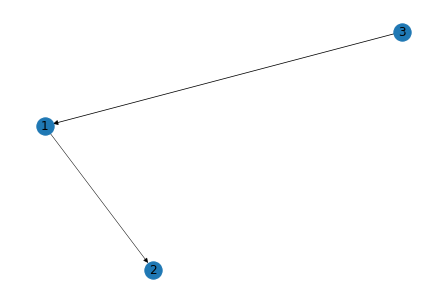

In [63]:
DG=nx.DiGraph()
DG.add_weighted_edges_from([(1,2,0.5), (3,1,0.75)])
weights = [DG[u][v]['weight'] for u,v in DG.edges]
nx.draw(DG, with_labels=True, width=5*weights)

**Note**: the width of the edges is proportional to the carried weight.

In [65]:
DG.out_degree(1,weight='weight'), DG.degree(1,weight='weight')

(0.5, 1.25)

In [66]:
list(DG.successors(1))

[2]

In [67]:
list(DG.neighbors(1))

[2]

### Exercise: load the edge list in ../Data/highschool.txt, plot the related directed network and find the most popular and the friend of all in the school

In [68]:
hs_path='../Data/highschool.txt'

In [69]:
hs_edlist=np.genfromtxt(hs_path, dtype='i8')

In [70]:
DG=nx.DiGraph()

In [71]:
for edge in hs_edlist:
    DG.add_edge(edge[0],edge[1])

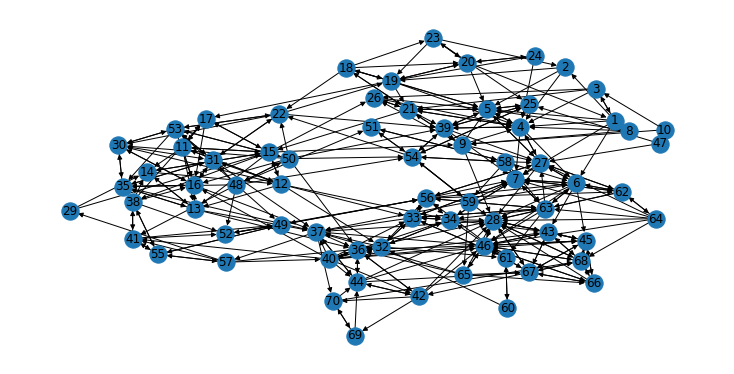

In [72]:
plt.figure(figsize=(10, 5))
nx.draw_kamada_kawai(DG, with_labels=True)

#### Greatest in-degree

In [73]:
in_deg=np.array(list(dict(DG.in_degree()).values()))

In [91]:
np.where(in_deg==np.max(in_deg))[0]+1

array([28])

In [75]:
np.max(in_deg)

18

In [92]:
np.where(in_deg==np.min(in_deg))[0]+1

array([ 8, 10, 47])

In [77]:
np.min(in_deg)

0

#### Greatest out-degree: is that the really the friend of all?

In [78]:
out_deg=np.array(list(dict(DG.out_degree()).values()))

In [89]:
np.where(out_deg==np.max(out_deg))[0]+1

array([40])

In [80]:
np.max(out_deg)

12

In [90]:
np.where(in_deg==np.min(out_deg))[0]+1

array([ 1,  2,  3, 18, 23, 40, 50, 57, 58, 59, 65, 69])

#### Reciprocated links

In [84]:
t_hs_edlist=[(edge[0], edge[1]) for edge in hs_edlist]

In [85]:
rk=np.zeros(DG.number_of_nodes())
for edge in t_hs_edlist:
    if edge[0]>edge[1] and (edge[1], edge[0]) in t_hs_edlist:
        rk[edge[0]-1]+=1
        rk[edge[1]-1]+=1

In [86]:
np.where(rk==np.max(rk))[0]+1

array([46])

## Bipartite networks
Actually, Networkx handles bipartite networks as monopartite network with tagged nodes. The main issues come when you want to display it properly...

In [154]:
import networkx as nx
from networkx.algorithms import bipartite

In [155]:
B = nx.Graph()

In [156]:
B.add_nodes_from([1, 2, 3, 4], bipartite=0)
B.add_nodes_from(['a', 'b', 'c'], bipartite=1)
B.add_edges_from([(1, 'a'), (1, 'b'), (2, 'b'), (2, 'c'), (3, 'c'), (4, 'a')])

In [157]:
color_dict=bipartite.color(B)

In [158]:
nx.set_node_attributes(B, color_dict, 'bipartite')

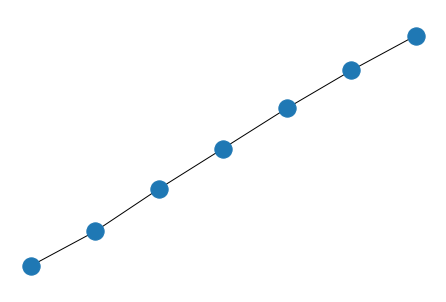

In [159]:
nx.draw_kamada_kawai(B)

...uhm, quite unsatisfying...

In [160]:
top, bottom=bipartite.sets(B)

In [161]:
top, bottom

({1, 2, 3, 4}, {'a', 'b', 'c'})

In [169]:
pos=nx.drawing.layout.bipartite_layout(B, top, align='horizontal')

In [170]:
pos

{1: array([-1.        ,  0.64285714]),
 2: array([-0.33333333,  0.64285714]),
 3: array([0.33333333, 0.64285714]),
 4: array([1.        , 0.64285714]),
 'b': array([-1.        , -0.85714286]),
 'c': array([ 0.        , -0.85714286]),
 'a': array([ 1.        , -0.85714286])}

In [171]:
real_color_dict={}
for t in list(top):
    real_color_dict[t]='salmon'
for t in list(bottom):
    real_color_dict[t]='cornflowerblue'

In [172]:
real_color_dict

{1: 'salmon',
 2: 'salmon',
 3: 'salmon',
 4: 'salmon',
 'b': 'cornflowerblue',
 'c': 'cornflowerblue',
 'a': 'cornflowerblue'}

In [173]:
node_color = [real_color_dict[node] for node in B.nodes()]

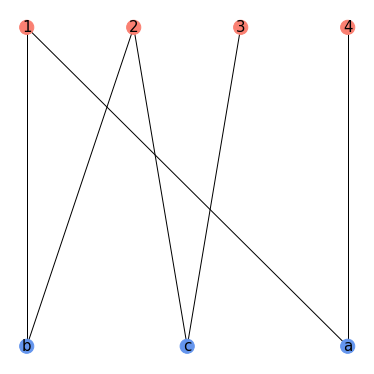

In [174]:
plt.figure(figsize=(5, 5))
nx.draw(B, with_labels=True, node_size=200, font_size=15, pos=pos, node_color=node_color)

### Exercise: load the edge list in ../Data/southern_women.txt and plot the related bipartite network

>This bipartite dataset shows the participation of 18 white women in 14 social events over a nine-month period. The data was collected in the Southern United States of America in the 1930s. There is an edge for every woman who participates in an event. The first column contains the women, the second column contains the events.

--[Konect website](http://konect.uni-koblenz.de/networks/)
<br/>**Pay attention!** Those data were downloaded from the web and do not use the Python form for indices: the first element here is 1 and not 0! **Pay attention 2!** the first two lines contains other uninteresting data regarding the network, you can safely skip them. 

In [178]:
sw_el=np.genfromtxt('../Data/southern_women.txt', skip_header=2, dtype='i8')

In [180]:
women=np.unique(sw_el[:,0])
events=np.unique(sw_el[:,1])

In [181]:
events

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [189]:
events_to_chr={e:chr(96+e) for e in events}

In [193]:
events_c=[events_to_chr[e] for e in events]

In [194]:
B=nx.Graph()
B.add_nodes_from(women, bipartite=0)
B.add_nodes_from(events_c, bipartite=1)

In [195]:
for edge in sw_el:
    B.add_edge(edge[0], events_to_chr[edge[1]])

In [196]:
top, bottom=bipartite.sets(B)

In [197]:
pos=nx.drawing.layout.bipartite_layout(B, top, align='horizontal')

In [198]:
real_color_dict={}
for t in list(top):
    real_color_dict[t]='salmon'
for t in list(bottom):
    real_color_dict[t]='cornflowerblue'

In [199]:
node_color = [real_color_dict[node] for node in B.nodes()]

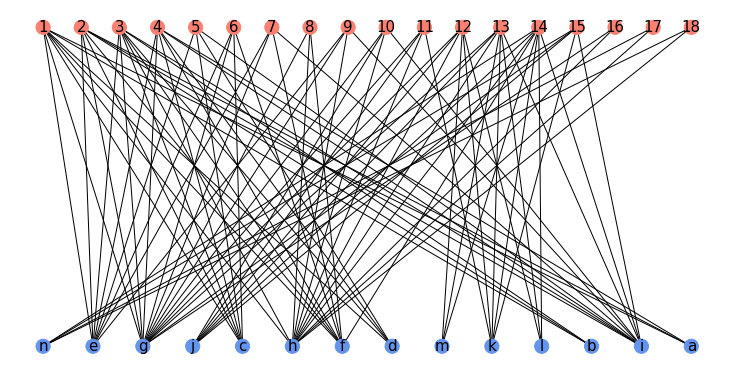

In [201]:
plt.figure(figsize=(10, 5))
nx.draw(B, with_labels=True, node_size=200, font_size=15, pos=pos, node_color=node_color)